# Heat equation in 1d using FTCS scheme
We will solve the heat equation
$$
u_t = u_{xx}, \qquad x \in (0,1)
$$
with boundary condition
$$
u(0,t) = u(1,t) = 0
$$
and initial condition
$$
u(x,0) = \sin(\pi x)
$$
The exact solution is given by
$$
u(x,t) = e^{-\pi^2 t} \sin(\pi x)
$$

In [48]:
import numpy as np
import matplotlib
matplotlib.use("nbagg")
import matplotlib.pyplot as plt
from matplotlib import gridspec
from IPython.display import clear_output

We first define the domain and some other parameters, and plot the initial condition.

<IPython.core.display.Javascript object>


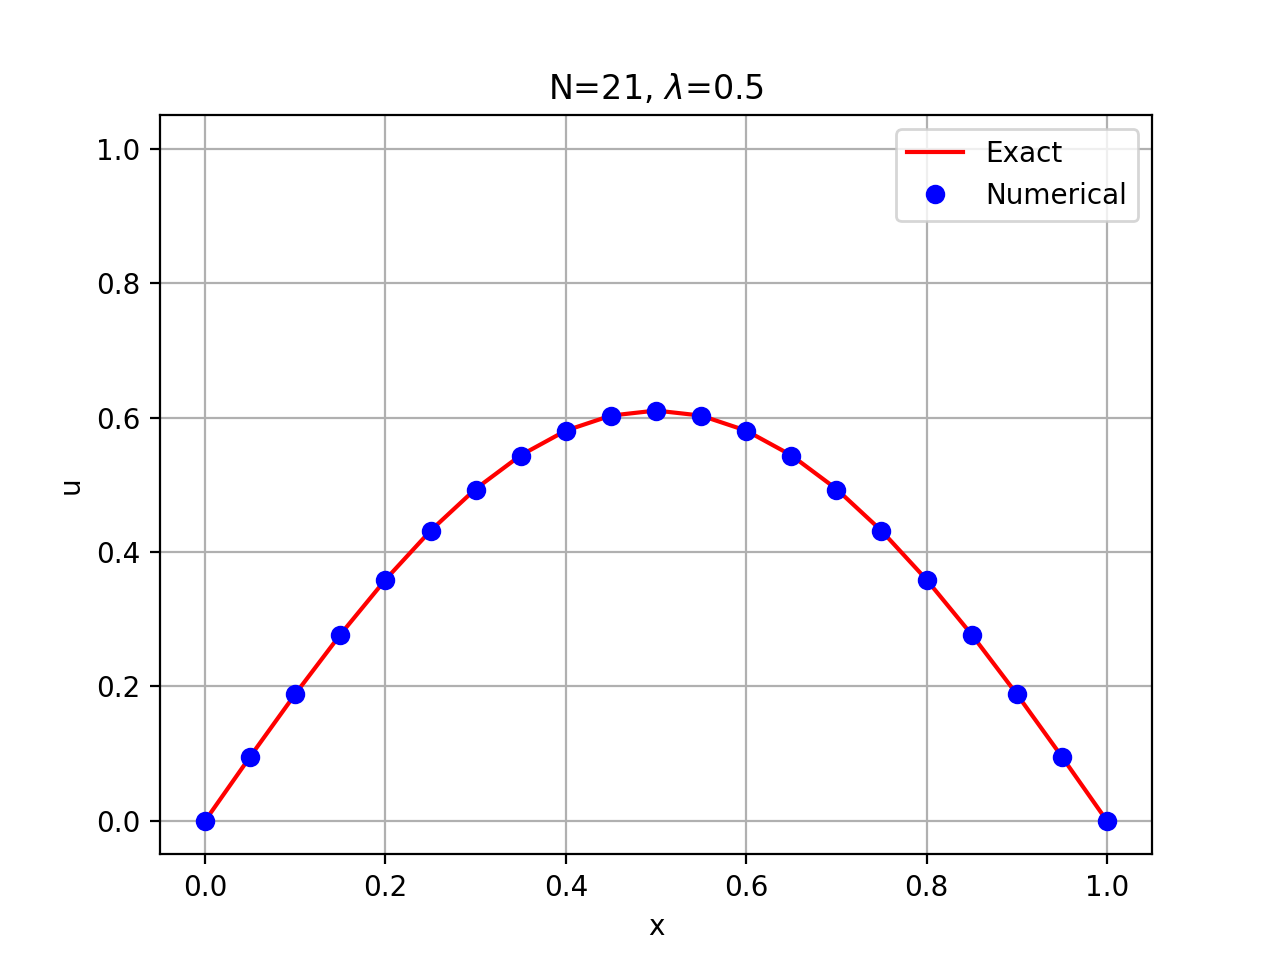

In [50]:
xmin, xmax = 0.0, 1.0
mu = 1.0

# Exact solution, also used for initial condition with t=0
def uexact(x,t):
    return np.exp(-mu*np.pi**2*t) * np.sin(np.pi*x)

# Parameters
N   = 21   # number of grid points
lam = 0.5  # used to define time step
Tf  = 0.05 # final time

h = (xmax - xmin)/(N-1)
dt= lam * h**2 / mu

x = np.linspace(xmin, xmax, N)
uinit = uexact(x,0.0);

plt.ion()
fig = plt.figure()
gs  = gridspec.GridSpec(1,1,width_ratios=[1],hspace=0.3,wspace=0.3)
ax = plt.subplot(gs[0])
line1, = ax.plot(x, uinit, 'r')
line2, = ax.plot(x, uinit, 'ob')
ax.set_xlabel('x'); ax.set_ylabel('u')
ax.set_title('N='+str(N)+', $\lambda$='+str(lam))
plt.legend(('Exact','Numerical'))
plt.grid(True)
plt.gcf().canvas.draw()
plt.show()

Next, we implement the FTCS scheme. The plot above will get updated as we iterate the solution.

In [51]:
u = uinit.copy()
t, it = 0.0, 0
while t < Tf:
    dt = np.min([dt,Tf-t])
    u[1:-1] = lam*u[0:-2] + (1-2*lam)*u[1:-1] + lam*u[2:]
    t += dt; it += 1
    clear_output(wait=True)
    print("it,t,umin,umax = %4d %12.4e %12.4e %12.4e" % (it,t,u.min(),u.max()))
    line1.set_ydata(uexact(x,t))
    line2.set_ydata(u)
    plt.gcf().canvas.draw()
    plt.pause(0.1)

print('Max norm error = ', np.abs(u-uexact(x,t)).max())

it,t,umin,umax =   40   5.0000e-02   0.0000e+00   6.0925e-01
Max norm error =  0.001245858215012552
